# Assignment 3

### Olga Iarygina

### Covariance and Principle Component Analysis

In the first part of this assignment, I use PCA in order to visualise global dataset structure and reduce dimensionality. 

(*) I just want to note that even though I used and submitted the .py templates, I still implemented functions right in the IPython notebook as it is more comfortable for me. I hope this is fine.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [9, 7.5]
plt.rcParams['figure.dpi'] = 100

data = np.loadtxt('murderdata2d.txt')

### ex1 :: performing pca

#### a-b) implementation and performing on murder

I have started to do the assignment in a little bit reversed order to make sure that at each step, I am doing everything correct. So, I first test my steps on the murder dataset.

So, first, we need to normalize our data by centring it to the origin. I thought that we should normalize it as we did in the previous assignment, but then I saw the tips. And now I just subtract the mean of each of the variables.

In [4]:
data_norm = data - np.mean(data , axis = 0)

Then we calculate the covariance matrix of the normalized data, which is just a squared matrix that shows the covariance of elements between each other.

In [5]:
cov = np.cov(data, rowvar = False)

And here we go to computing eigenvectors and eigenvalues with just np.linalg module.
Each vector is representing the principal axis, and they are mutually perpendicular to each other. I use np.linalg.eigh as it returns ina known ascending order.

In [6]:
eig_val, eig_vec = np.linalg.eigh(cov)

Then we sort the eigenvalues from the highest to the lowest along with the corresponding eigenvector. 


In [7]:
sort = np.argsort(eig_val)[::-1]
 
sort_eig_val = eig_val[sort]
sort_eig_vec = eig_vec[:, sort]

In [8]:
sort_eig_vec

array([[ 0.1054526 , -0.99442433],
       [ 0.99442433,  0.1054526 ]])

So, now I can put all these calculations in the single function, which actually was required in (a). The function returns eigenvectors spanning principle components and eigenvalues corresponding to the variance of the data in the direction of the eigenvector.

In [9]:
def pca(data):
    
    cov = np.cov(data, rowvar = False) # covariance matrix
    eig_val, eig_vec = np.linalg.eigh(cov) # eigenvectors and eigenvalues
    
    sort = np.argsort(eig_val)[::-1] # sorting
    sort_eig_val = eig_val[sort]
    sort_eig_vec = eig_vec[:, sort]
    
    return sort_eig_val, sort_eig_vec

And then I check how does it work.

In [10]:
pca(data)

(array([98.73614228,  0.36319983]),
 array([[ 0.1054526 , -0.99442433],
        [ 0.99442433,  0.1054526 ]]))

#### b) plotting

Continuing with step b, I visualize the result using a scatter plot. The dataset is plotted along with the mean, as well as PC pointing out of the mean value. Each eigenvector here has a length that is scaled by the SD of the data projected onto that eigenvector. I use the template code from the lecture ipynb.

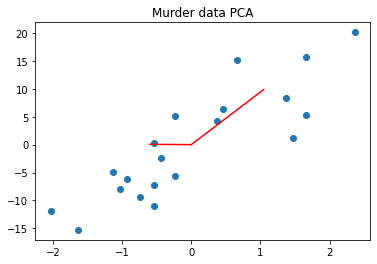

In [12]:
%matplotlib inline

plt.scatter(data_norm[:, 0], data_norm[:, 1])
evals, evecs = pca(data)

# here we compute the corresponding standard deviations
sd0 = np.sqrt(evals[0])
sd1 = np.sqrt(evals[1])

plt.plot([0, sd0 * evecs[0, 0]], [0, sd0 * evecs[1, 0]], 'r')
plt.plot([0, sd1 * evecs[0, 1]], [0, sd1 * evecs[1, 1]], 'r')

plt.title("Murder data PCA")
plt.show()

The subspaces spanned by these two vectors are principal components.

#### c) pesticide dataset

Then we move to perform PCA on the pesticide dataset. It is not specified in the assignment which dataset to use, Train or Test. I concatenated them into a single one.

In [13]:
dataTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter = ',')
dataTest = np.loadtxt('IDSWeedCropTest.csv', delimiter = ',')

XTrain = dataTrain[:, :-1] 
YTrain = dataTrain [:, -1] 
XTest = dataTest[:, :-1] 
YTest = dataTest[:, -1]

pest = np.concatenate([dataTrain, dataTest])

I plot the variance versus PC index, which is a scree plot as I know. 
It could be used as some kind of diagnostics and revealing if PCA works fine. The PCs are ordered according to the amount of variance they cover.

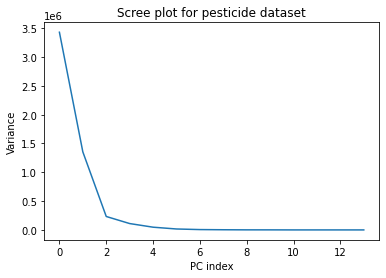

In [17]:
evals, evecs = pca(pest)
plt.plot(evals)

plt.xlabel("PC index")
plt.ylabel("Variance")
plt.title("Scree plot for pesticide dataset")

plt.show()

The latter the PCs, the more stabilized it is (when it flattens out). For index 12, there is one vector at that point. And the variance is very small there. The fact that it is stabilized means that there is noise data along the axis.

#### d) unnormalized occupancy

In this task, I perform PCA using the Occupancy dataset, using unnormalized data. I again plot the variance versus the index of the principal components, and the variance is stabilizing in this case again, meaning that it primarily captures the noise.

In [15]:
occ = np.loadtxt('occupancy_data.csv', delimiter = ',')

In [16]:
occ = occ[:, :-1] 
# I remove the last column with information about labels for PCA and clustering as it was said in the appendix

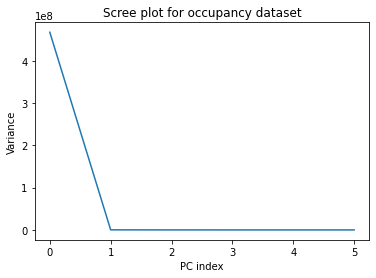

In [19]:
evals, evecs = pca(occ)
plt.plot(evals)

plt.xlabel("PC index")
plt.ylabel("Variance")
plt.title("Scree plot for occupancy dataset")

plt.show()

#### e) standardized occupancy

This time I standardize the dataset with the code provided in the text of the assignment. Actually, we compute the column deviations here. And then, I again plot the variance versus the PC index. 

In [22]:
stddev = np.std(occ, axis = 0)
stddev.shape = (1, -1)
norm_occ = occ/stddev

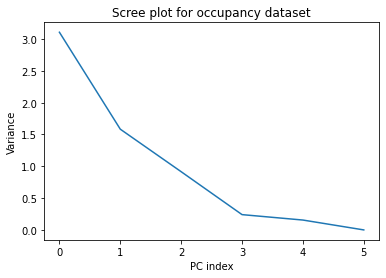

In [23]:
evals, evecs = pca(norm_occ)
plt.plot(evals)

plt.xlabel("PC index")
plt.ylabel("Variance")
plt.title("Scree plot for occupancy dataset")

plt.show()

The line changes in this case. We see that the first five principal components cover some variance in this case, but still first two capture most of the information.

In the end, I normalize the variance along all of the principal components, and all the variances are summing up to 1. Doing this, I get the cumulative normalized variance which allows me to see which quantity of variance is described by each of the principal components.

In [24]:
np.cumsum(evals/sum(evals))

array([0.51751841, 0.7813107 , 0.93379476, 0.97393729, 0.999882  ,
       1.        ])

In [25]:
np.where(np.cumsum(evals/sum(evals)) >= 0.9)

(array([2, 3, 4, 5]),)

In [26]:
np.where(np.cumsum(evals/sum(evals)) >= 0.95)

(array([3, 4, 5]),)

So, we need 3 components to capture 90% of the variance, and 4 components for 95%.

### ex 2 :: visualization in 2D

In this exercise, I perform multidimensional scaling. It is the way to visualise the dataset in either 2 or 3 dimensions and at the same time preserve the distances between pairs of the data points as much as possible. Actually, we just project the data points onto the specified number of principal components.

#### a) projecting onto the  principal components

Here I first create the function that projects any dataset onto the specified amount of the principal components. I use the template provided, and the function gets the data and number of dimensions as the input and outputs the N x d matrix that contains the d coordinates of N original data points projected onto d principle components. 

To get the eigenvectors and eigenvalues, I use the code that I have written before for PCA computation. And also, I used the code from the lecture handout to get some intuition into modifying eigenvectors and eigenvalues.

In [28]:
def mds(data, d):

    cov = np.cov(data, rowvar = False) # here I just use the same code I used in PCA function
    evals, evecs = np.linalg.eigh(cov)

    evals = evals[::-1]  # then I use the code for selecting dimensions from pca_lecture_handout
    evecs = evecs[:, ::-1]

    p_comp = evecs[:, :d]

    mat = data @ p_comp  # here we get the dot product

    return mat  

In [29]:
mds(pest, 2)

array([[ -966.77690785, -4310.54750178],
       [ -844.53492861, -3749.75052207],
       [-1973.58299624, -3625.8329038 ],
       ...,
       [ -693.18127312, -3662.84936725],
       [-3103.59843342, -2105.50357769],
       [-1342.37555316, -3466.60645181]])

Then we plot the projected data.

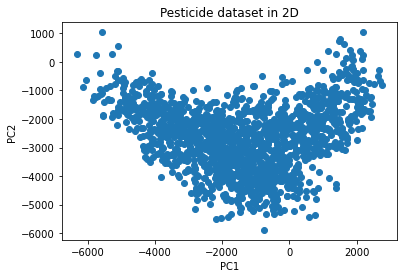

In [30]:
proj_pest = mds(pest, 2)

plt.scatter(proj_pest[:, 0], proj_pest[:, 1])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Pesticide dataset in 2D")

plt.show()

So, we visualize the structure of the investigated data set. It is more or less uniform, as we do not see any separation into clusters along any of the principal components.

#### b) normalised and unnormalised data projection

Then I a little bit modify not exactly my function but the preprocessing of the data in order to project and compare normalized and unnormalized data.
In the first case, we just repeat the procedure as it was before, only changing the dataset.

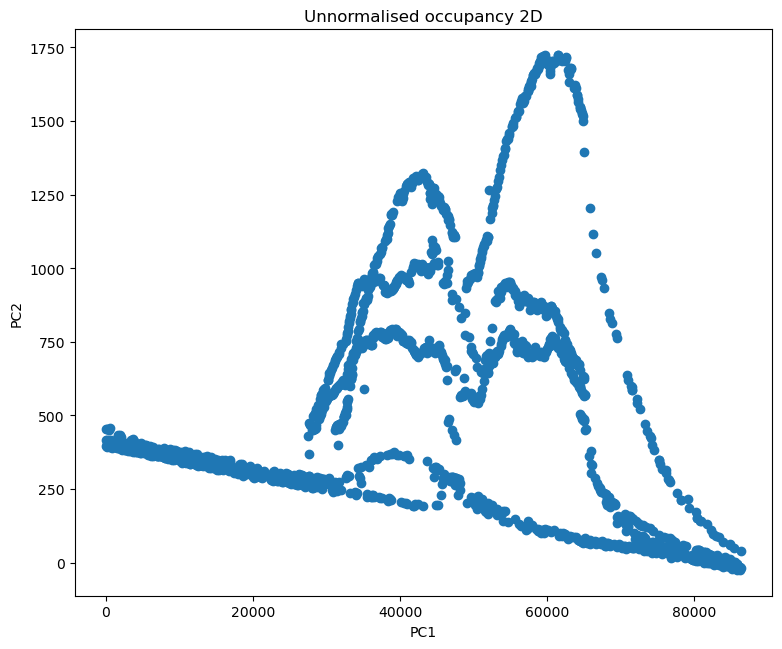

In [33]:
proj_un_occ = mds(occ, 2)
plt.scatter(proj_un_occ[:, 0], proj_un_occ[:, 1])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Unnormalised occupancy dataset in 2D")

plt.show()

And then, we normalize the data as we've done it in the previous assignment: from each of the points, I subtract the mean and divide it by the standard deviation.

The plot has changed a lot. We do not have these continuous lines of points along with the first principle component anymore, and overall the structure changed a lot. To be honest, it is quite hard to meaningfully interpret this for me, as this is not a survey data or something like that, so I just leave this task in the form of plots.

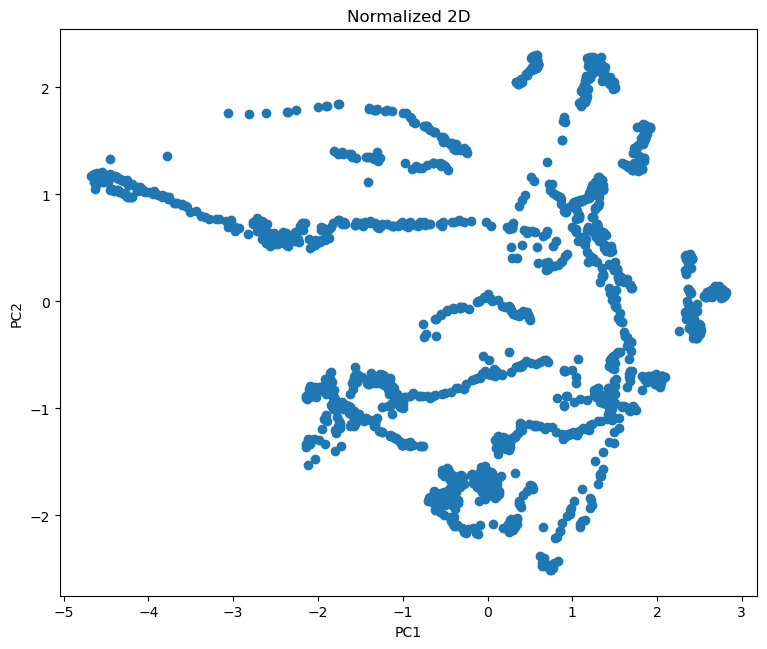

In [34]:
norm_occ = (occ - np.mean(occ, axis = 0))/np.std(occ, axis = 0)

proj_norm_occ = mds(norm_occ, 2)
plt.scatter(proj_norm_occ[:, 0], proj_norm_occ[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Normalised occupancy dataset in 2D")

plt.show()

#### c) virtual chocolate box question

Actually, I used Matplotlib3D only in the Vision and Image Processing course once. So I played with this 'Virtual Chocolate Box' question just to see whether I am capable of visualising it in 3D or not. I think this is a success :)
The only thing is that I do not rotate it, as my computer is dying if I do that. 

So, first, I plot it with unstandardized data. Actually, it is quite interesting because in this case, we can see that the data is kind of separated into 2 clusters along the third principle axis!

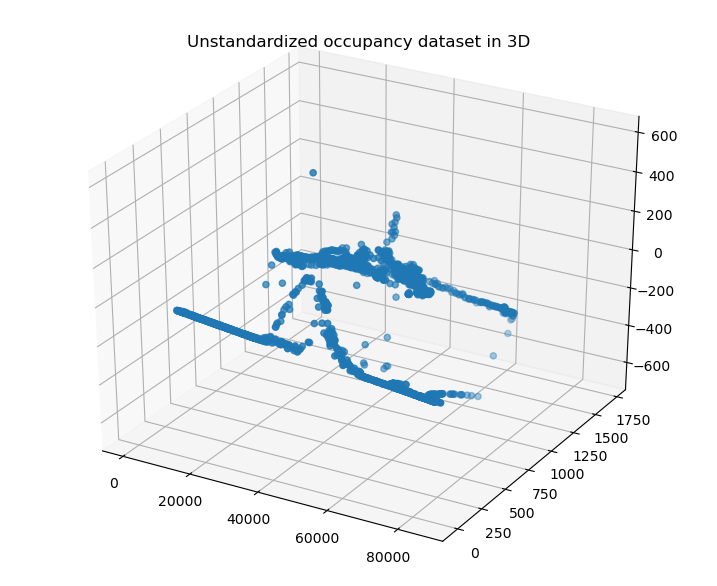

In [39]:
from mpl_toolkits import mplot3d

proj_un_occ = mds(occ, 3)

fig = plt.figure()
ax = plt.axes(projection = '3d')

plt.title('Unstandardized occupancy dataset in 3D')

ax.scatter3D(proj_un_occ[:, 0], proj_un_occ[:, 1], proj_un_occ[:, 2])

Then, we standardize the data and visualize it in 3D again. Standardization leaves us without these clusters, but we see that the points are elongated along with the third principal component.

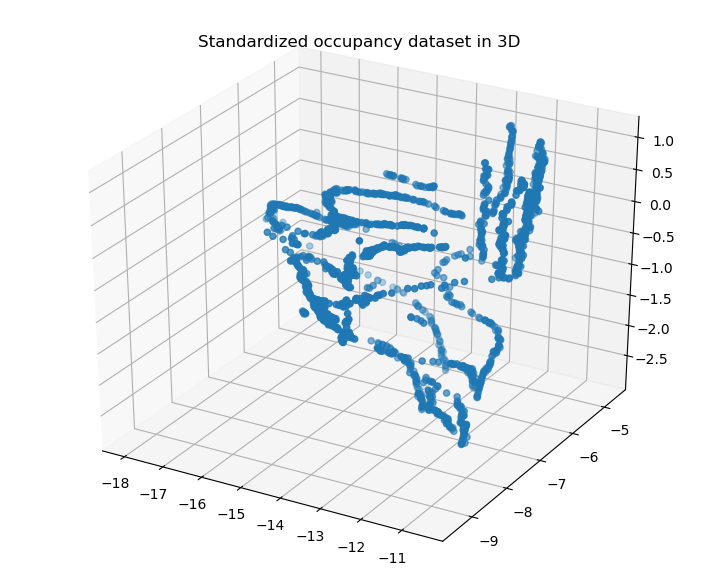

In [41]:
stddev = np.std(occ, axis = 0)
stddev.shape = (1, -1)
norm_occ = occ/stddev

proj_norm_occ = mds(norm_occ, 3)

fig = plt.figure()
ax = plt.axes(projection = '3d')

plt.title('Standardized occupancy dataset in 3D')

ax.scatter3D(proj_norm_occ[:, 0], proj_norm_occ[:, 1], proj_norm_occ[:, 2])

plt.show()

### ex 3 :: clustering

In exercise 3, I perform the k-means clustering. I decided to try to implement the algorithm on my own, following the tips in the text assignment. I start with initializing the cluster centres with the first two data points in Train data as we were asked to do in the assignment, using the template code.

In [42]:
startingPoint = np.vstack((XTrain[0 ,] ,XTrain[1 ,]))

Then I implement the kmeans. I create a function that returns me only the cluster centres. I use 100 iterations as it is done in sklearn kmeans implementation.

First, I just insert the data with precomputed centroids, which is unusual but was asked to do. Then I assign each point of the data to a cluster with the closest centroid by just computing the distances between the point and centroid. I repeat the procedure in 100 iterations. After, for each cluster, I reveal the new cluster centroid by computing the mean vector of the points in the resulting cluster. And then I just return the new cluster centroids

In [49]:
def kmeans(data, n_clusters, max_iter = 100):
    
    centroids = startingPoint # initialize centroids
    
    for i in range(max_iter):
        
        cluster = np.array([np.argmin([np.dot(x - y, x - y) for y in centroids]) for x in data])  # assign the clusters

        centroids = [data[cluster == l].mean(axis = 0) for l in range(n_clusters)] # compute the new centroid
        
    return np.array(centroids) # return cluster centroids

And this is what we get wit the occupancy data as the result.

In [50]:
kmeans(XTrain, 2)

array([[5.70726496e+00, 4.93012821e+01, 7.92408120e+02, 3.85595940e+03,
        3.38821368e+03, 1.35652778e+03, 2.91737179e+02, 1.29989316e+02,
        6.86111111e+01, 3.81880342e+01, 1.87692308e+01, 4.13461538e+00,
        4.42307692e-01],
       [2.19924812e+00, 1.40018797e+01, 1.73727444e+02, 1.40094549e+03,
        3.18759962e+03, 2.62043985e+03, 1.00147368e+03, 6.31413534e+02,
        4.95295113e+02, 2.95238722e+02, 1.45689850e+02, 2.91466165e+01,
        2.82330827e+00]])

### ex 4 :: Bayesian Statistics

In the final exercise I just answer the questions about Bayesian Statistics.

* How is probability interpreted differently in the frequentist and Bayesian views?

The Bayesian framework interprets probability as a measure of certainty or as a degree of belief. Opposed to the Bayesian view is the frequentist view, where the probability is interpreted as frequency, and an event's probability is the frequency of observing that event in a large number of trials.

* Cheap, efficient computers played a major role in making Bayesian methods mainstream. Why?

Bayesian methods are usually analytically intractable, so we are not able to write down the solutions in mathematically closed expressions or nice formulas. Therefore it requires methods based on simulations, which are not possible to compute without efficient computers.  

* What is the difference between a Bayesian credible interval and a frequentist confidence interval?

When we interpret a Bayesian credible interval, we believe that the value of the parameter of interest lies in the interval with a probability of, for example, 0.95 if we have a 95% confidence interval. Instead of the point estimate, we summarize the posterior with an interval. So, the confidence interval is based on the probability of theta given data, where the parameter is random and the data is fixed. 

On the contrary, in the frequentist view, confidence intervals are interpreted differently and not so intuitive. The data is random in this case, and the parameter is fixed. Therefore, the 95% confidence interval interpretation is that for a large number of experiments with the procedure chosen, 95% of the resulting confidence intervals include the true value of the parameter.

* How does a maximum likelihood estimate approximate full Bayesian inference?

If we assume that the prior is uniform and the error is zero-one, we obtain the MLE. It is not just a certain loss function, and it is a point estimate that we get if we find the maximum of the likelihood - the probability of data given theta. As we assume that the prior is uniform, it is not included in the formula.

It is often a good approximation, but it can go badly wrong, for example, if the data are sparse or if a uniform prior actually induces strong and unsuited prior beliefs. A uniform prior is not necessarily a prior that indicates ignorance, and we use a prior, which is equally likely over everything.

* When will point estimates be a good approximation of full Bayesian inference?

If the full Bayesian inference is very complicated and intractable, we can get an approximation. Also this is a case for a large data. One way is MLE described above.  